# Combination of SpSn of different Modalities 

Definitions:
$$C = \{Consesus\ decision\}\ \ \ \ X = \{True\ involvement\}\ \ \ \ A_i = \{modality\ i\ involvement\}\ \ \ \ D = \{possible\ diagnoses\}\ \ \ \ n = \#\ of\ modalities$$


Each of the modalities have different specificity and sensitivity defined as:

$$specificity: P(A_{i} = 0 \mid X = 0)$$
$$sensitivity: P(A_{i} = 1 \mid X = 1)$$

and we want to find the respective values for our consensus decision:
$$specificity: P(C = 0 \mid X = 0)$$
$$sensitivity: P(C = 1 \mid X = 1)$$

The diagnoses of our seperate modalities we can combine in a single diagnose (spsn of different modalities are independent of each other)
$$P(D \mid X) = P(\bigcap_{i=1}^{n}A_{i} \mid X) = \prod_{i=1}^{n} P(A_{i} \mid X)$$


We defined our consesus decision s.t. 

$$C= 
\begin{cases}
    1 & \text{if } P(D \mid X=1) > P(D \mid X=0)\\
    0              & \text{otherwise}
\end{cases}$$


We can call $D_{C=1}$ the subset of diagnoses for which the condition $P(D \mid X=1) > P(D \mid X=0)$ holds and give the overall specificity and sensitivity based on this
$$P(C = 0 \mid X = 0) = \sum P(D_{C=0} \mid X=0)$$
$$P(C = 1 \mid X = 1) = \sum P(D_{C=1} \mid X=1)$$

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [8]:
spsnA1 = [0.66,0.73]
spsnA2 = [0.83, 0.75]
spsnA3 = [0.7, 0.84]
spsns = [spsnA1, spsnA1,spsnA1]

In [15]:
possible_D = list(itertools.product([0,1], repeat=len(spsns)))
p_D_X = np.ones(shape=(len(possible_D),))
p_D_nX = np.ones(shape=(len(possible_D),))
p_decision = np.full(shape=(len(possible_D),), fill_value= -1)
for k, inv in enumerate(possible_D):
    for i, spsn in enumerate(spsns):
        p_Ai_X = spsn[1] if inv[i] else (1-spsn[1])
        p_Ai_nX = (1-spsn[0]) if inv[i] else spsn[0]
        p_D_X[k] *= p_Ai_X
        p_D_nX[k] *= p_Ai_nX

p_decision = (p_D_X - p_D_nX)        
p_C_X = 0
p_C_nX = 0
for i, pD in enumerate(p_decision):
    if (pD >= 0):
        p_C_X += p_D_X[i]
    if (pD < 0):
        p_C_nX += p_D_nX[i]
print(p_C_nX)
print(p_C_X)



possible_D_names = [f"{d}" for d in possible_D]

0.731808
0.8206659999999999


[0.019683 0.053217 0.053217 0.143883 0.053217 0.143883 0.143883 0.389017]


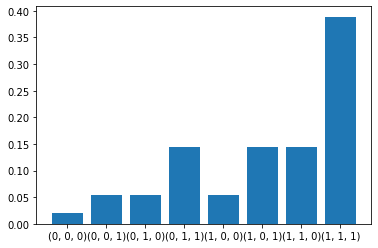

In [10]:
plt.bar(possible_D_names, p_D_X)
print(p_D_X)

[0.287496 0.148104 0.148104 0.076296 0.148104 0.076296 0.076296 0.039304]


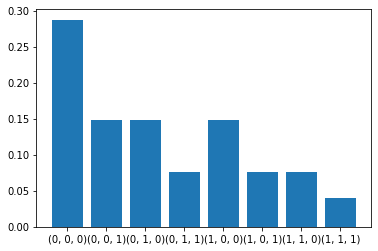

In [11]:
plt.bar(possible_D_names, p_D_nX)
print(p_D_nX)

[-0.267813 -0.094887 -0.094887  0.067587 -0.094887  0.067587  0.067587
  0.349713]


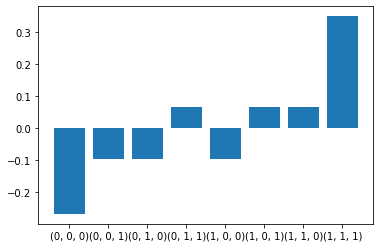

In [12]:
plt.bar(possible_D_names, p_decision)
print(p_decision)

In [13]:
### Simulated Sensitivity